In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import datetime

from afinn import Afinn
afinn = Afinn(emoticons=True)

import seaborn as sns
import matplotlib.pyplot as plt

#reading the file with reviews
file = pd.read_excel ('reviews.xlsx')

In [2]:
#creating the pandas' DataFrame
df = pd.DataFrame(file, columns=file.columns)

In [24]:
#adding new two column: 'score' and 'sentiment_category' 
score = []
[score.append(afinn.score(af)) for af in df.iloc[:,3]]
df['score'] = score

comLength = []
[comLength.append(len(af)) for af in df.iloc[:,3]]

df['comment_length'] = comLength

sentiment_category = ['positive' if sco > 0 
                          else 'negative' if sco < 0 
                              else 'neutral' 
                                  for sco in score]
    

df['sentiment_category'] = sentiment_category

sorted = df.sort_values(['helpful', 'score'], ascending = [False, False])
#sorted

In [4]:
#DateType to Int (normalisation)

dateInt = []

[dateInt.append(int(s.strftime('%Y%m%d'))) for s in df['date'].tolist() ]

df['date_int'] = dateInt
df['helpful'] = df['helpful'].fillna(0)

df_corr2 = pd.DataFrame(file, columns=['helpful', 'comment_length', 'score', 'date_int'])

df_corr2.corr()

,helpful,comment_length,score,date_int
helpful,1.000000,0.250963,0.065554,-0.003826
comment_length,0.250963,1.000000,0.241828,0.104685
score,0.065554,0.241828,1.000000,-0.083378
date_int,-0.003826,0.104685,-0.083378,1.000000


965
1291
163.0
965
Correlation without extreme values
0.43781754628148845


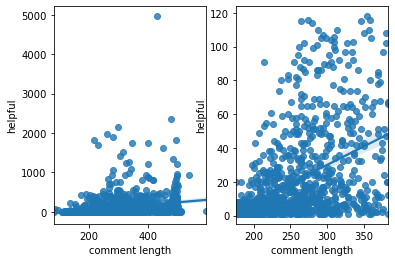

In [5]:
x = df['comment_length'].values
y = df['helpful'].values


#eliminating values that are beyond n standard deviations
n = 1
m = 1
drop_extreme_x = [a for a in x if abs(a - np.mean(x)) < np.std(x) * n] 
drop_extreme_y = [a for a in y if abs(a - np.mean(y)) < np.std(y) * m]
print(len(drop_extreme_x))
print(len(drop_extreme_y))
print((len(drop_extreme_y) - len(drop_extreme_x)) /2)

#obtaining the same range of values for 'helpful'and for 'comment_length'
drop_extreme_y.sort(reverse=True);
print(len(drop_extreme_y[162:1127]))

#display correlation before eliminating extreme values
plt.subplot(1, 2, 1)
plt.xlabel('comment length')
plt.ylabel('helpful')
sns.regplot(x,y)

#display correlation after eliminating extreme values
plt.subplot(1, 2, 2)
plt.xlabel('comment length')
plt.ylabel('helpful')
sns.regplot(drop_extreme_x,drop_extreme_y[162:1127])

print("Correlation without extreme values")
print(np.corrcoef(drop_extreme_x,drop_extreme_y[162:1127])[0,1])

965
985
10.0
965
Correlation
0.45471267497079915


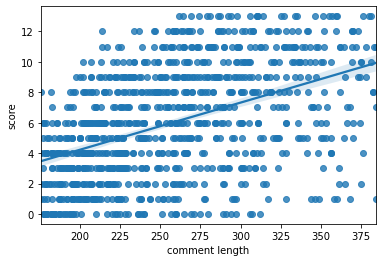

In [6]:
x = df['comment_length'].values
y = df['score'].values

#eliminating values that are beyond n standard deviations
n = 1
m = 1
drop_extreme_x = [a for a in x if abs(a - np.mean(x)) < np.std(x) * n] 
drop_extreme_y = [a for a in y if abs(a - np.mean(y)) < np.std(y) * m]

print(len(drop_extreme_x))
print(len(drop_extreme_y))
print((len(drop_extreme_y) - len(drop_extreme_x)) /2)
#obtaining the same range of values for 'helpful'and for 'score'
drop_extreme_y.sort(reverse=True);
print(len(drop_extreme_y[4:969]))


#display correlation after eliminating extreme values
plt.xlabel('comment length')
plt.ylabel('score')
sns.regplot(drop_extreme_x,drop_extreme_y[4:969])
print("Correlation")
print(np.corrcoef(drop_extreme_x,drop_extreme_y[4:969])[0,1])

In [8]:
#counting words encounter
from collections import Counter

comments = ""

for comment in df['comment']:
    comments += comment

counted = Counter(comments.split())


#for key, value in zip(counted.keys(), counted.values()):
    #print(key, value)
    

In [23]:
#just a plan how to analyse number of words encounter
#and display DataFrame of counted words
df_words_count = pd.DataFrame()

df_words_count['words'] = counted.keys()
df_words_count['count'] = counted.values()


sorted = df_words_count.sort_values(['count'], ascending=[False])
pd.set_option('display.max_rows', None)
#sorted